In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("C:/Users/KENNEDY/Downloads/Mall_customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# univariate analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

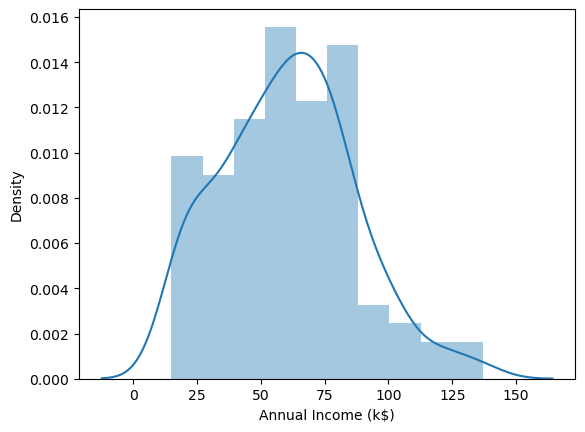

In [9]:
sns.distplot(df['Annual Income (k$)'])

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

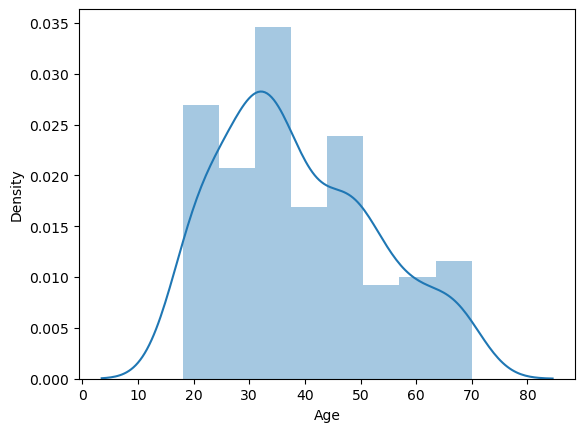

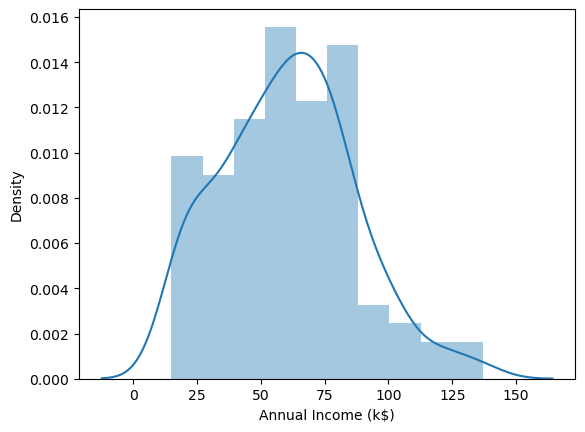

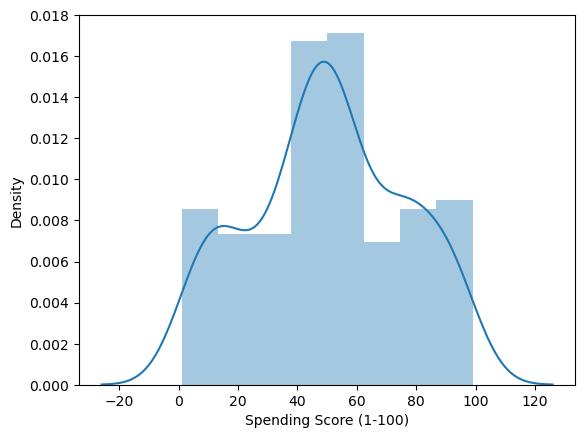

In [12]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

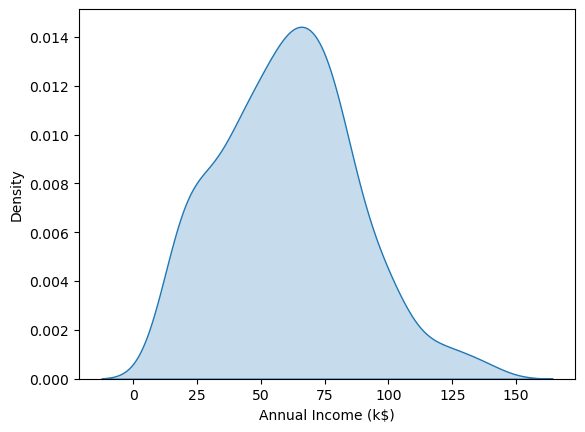

In [17]:
sns.kdeplot(df['Annual Income (k$)'],shade = True,);

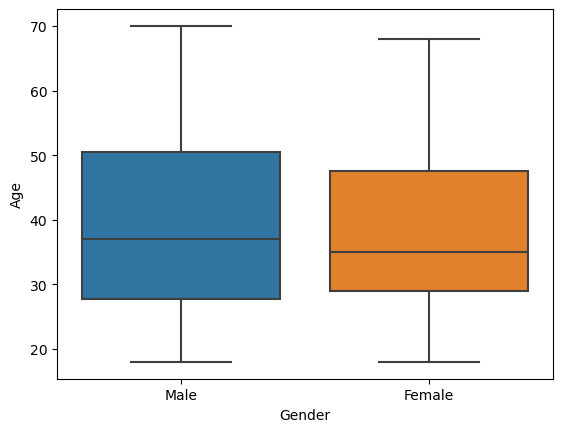

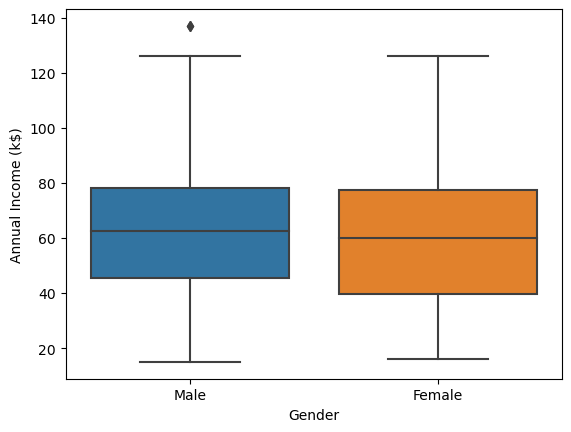

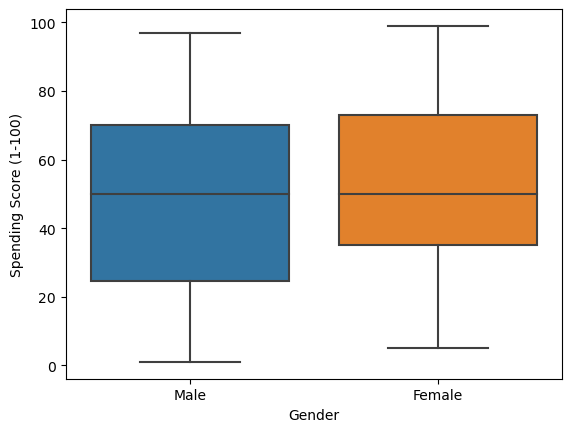

In [27]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x= 'Gender',y=df[i]);

In [29]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [30]:
#bivariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

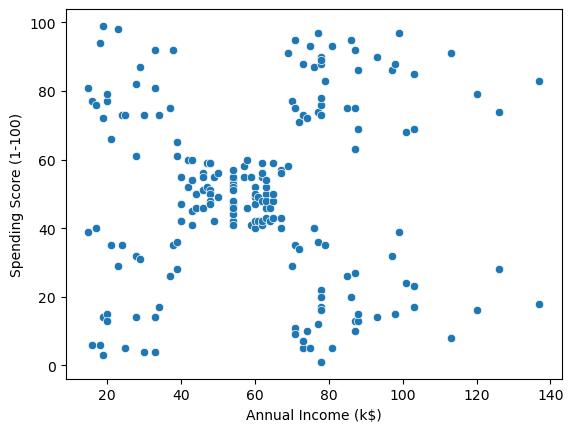

In [33]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

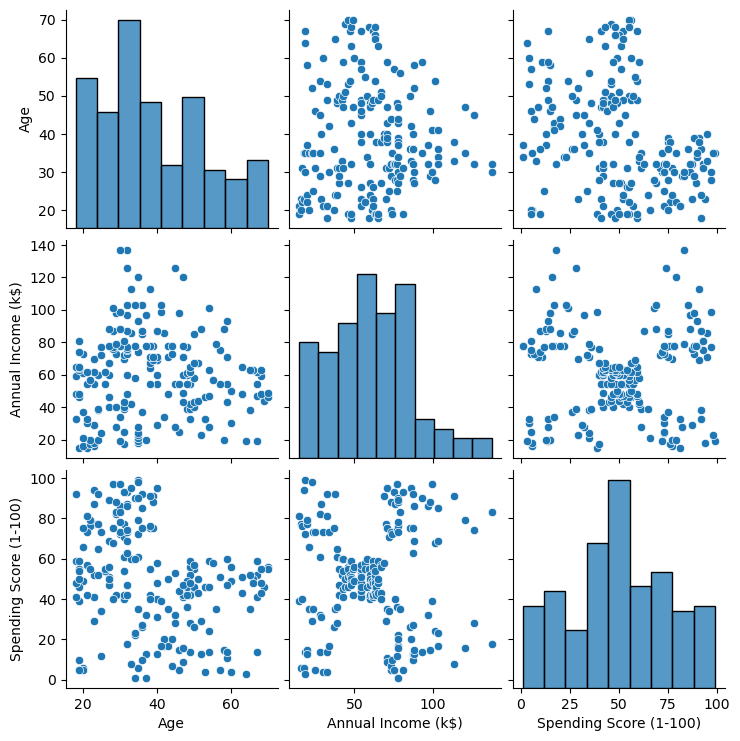

In [42]:
sns.pairplot(df)

In [44]:
df.groupby(["Gender"])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [45]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

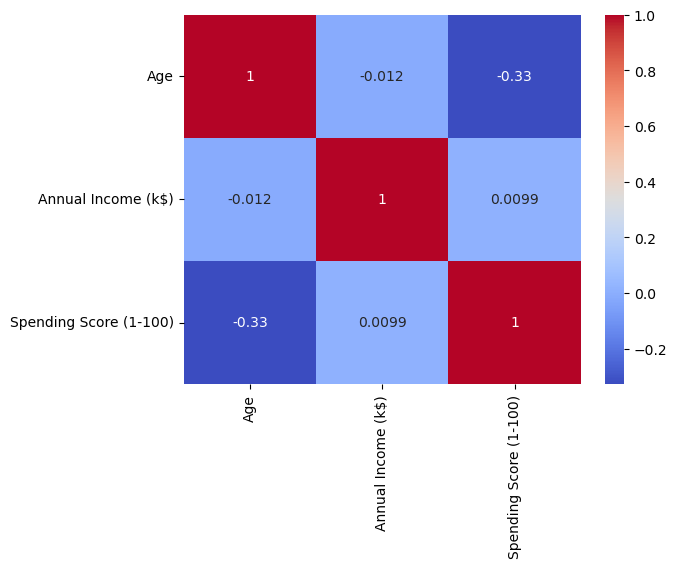

In [48]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# clusturing-univariate,bivariate,multivariate

In [73]:
clustering1 = KMeans(n_clusters=3)

In [74]:
clustering1.fit(df[['Annual Income (k$)']])
KMeans()

KMeans()

In [75]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [76]:
df["Income cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [77]:
df['Income cluster'].value_counts()

0    90
1    74
2    36
Name: Income cluster, dtype: int64

In [82]:
clustering1.inertia_

23517.33093093093

In [83]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=1)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [84]:
inertia_scores

[137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006,
 137277.28000000006]

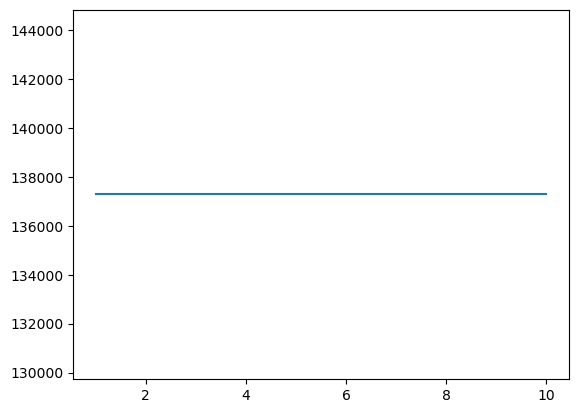

In [85]:
plt.plot(range(1,11),inertia_scores)

In [86]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [87]:
df.groupby("Income cluster")['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [88]:
#bivariate clustering

In [94]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
df["spending and income cluster"]=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,spending and income cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,3
2,Female,20,16,6,1,2
3,Female,23,16,77,1,3
4,Female,31,17,40,1,2


In [ ]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=1)
    kmeans2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores)

In [100]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.colums =['x','y']

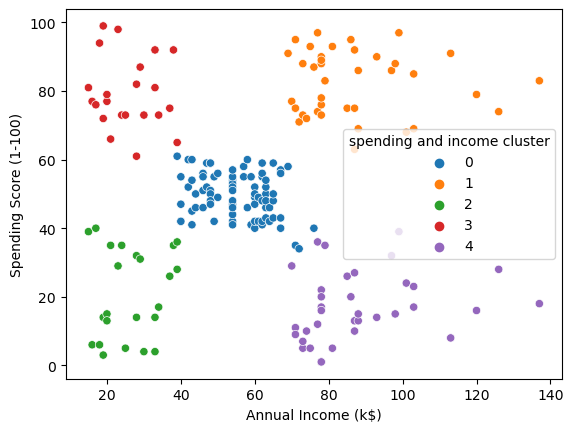

In [125]:
sns.scatterplot(data=df, x ='Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'spending and income cluster',palette= 'tab10')
plt.savefig('clustering_bivariate.png')

In [109]:
pd.crosstab(df['spending and income cluster'],df['Gender'],normalize="index")

Gender,Female,Male
spending and income cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In [110]:
df.groupby("spending and income cluster")['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending and income cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


In [111]:
#multivariate clustering

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scale = StandardScaler()

In [114]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,spending and income cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,3
2,Female,20,16,6,1,2
3,Female,23,16,77,1,3
4,Female,31,17,40,1,2


In [116]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,spending and income cluster,Gender_Female,Gender_Male
0,19,15,39,1,2,0,1
1,21,15,81,1,3,0,1
2,20,16,6,1,2,1,0
3,23,16,77,1,3,1,0
4,31,17,40,1,2,1,0


In [117]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income cluster',
       'spending and income cluster', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [118]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [120]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


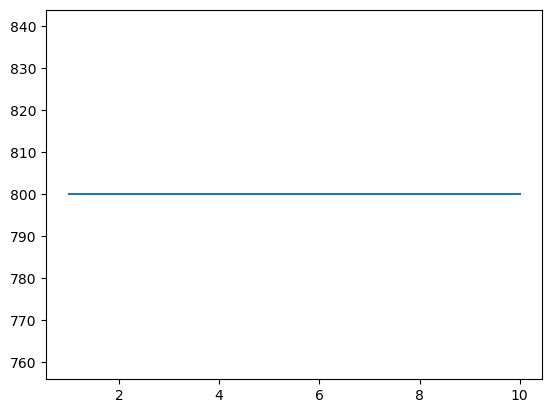

In [123]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=1)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [124]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,spending and income cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,3
2,Female,20,16,6,1,2
3,Female,23,16,77,1,3
4,Female,31,17,40,1,2
...,...,...,...,...,...,...
195,Female,35,120,79,2,1
196,Female,45,126,28,2,4
197,Male,32,126,74,2,1
198,Male,32,137,18,2,4


In [ ]:
df.to_csv("clustering.csv")